## 1hr projections over 12 years 2008-2020

### Seasonal Adjustment
#### Removal of seasonality

Dont forget to add more years 

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [122]:
df = pd.read_table('X:\data_dumps\OMNI2_H0_MRG1HR_203984_mega08_15.csv', sep=',', names=['time', 'kp', 'dst','ae', 'ap','al', 'au'], skiprows=1, header=None) 

In [123]:
#df = pd.read_table('X:\data_dumps\OMNI2_H0_MRG1HR_80166.csv', sep=',', names=['time', 'kp', 'ae', 'al', 'au'], skiprows=1, header=None) 

###### removing missing data - we arnt looking to do anything fancy here it is just a method we are creating so droping values is fine

In [124]:
df = df.replace([99999.9, 9999.99, 999.99, 999999.0 ,999999.00,-99999.990000,-99999.990000, 99999, '#REF!'],np.nan)

##### We drop the year 2020 because there is no data avaliable

In [125]:
df = df[~(df['time'] > '2019-12-31')]

In [126]:
df

,time,kp,dst,ae,ap,al,au
0,2008-01-01T23:30:00.000Z,10,-3,8,4,-2.0,6.0
1,2008-01-02T00:30:00.000Z,3,-1,10,2,-3.0,7.0
2,2008-01-02T01:30:00.000Z,3,0,10,2,-4.0,6.0
3,2008-01-02T02:30:00.000Z,3,-1,9,2,-5.0,4.0
4,2008-01-02T03:30:00.000Z,0,1,10,0,-4.0,6.0
...,...,...,...,...,...,...,...
105140,2019-12-30T19:30:00.000Z,3,5,9999,2,NaN,NaN
105141,2019-12-30T20:30:00.000Z,3,6,9999,2,NaN,NaN
105142,2019-12-30T21:30:00.000Z,7,9,9999,3,NaN,NaN
105143,2019-12-30T22:30:00.000Z,7,12,9999,3,NaN,NaN


In [127]:
df2 = df.copy()

In [128]:
df

,time,kp,dst,ae,ap,al,au
0,2008-01-01T23:30:00.000Z,10,-3,8,4,-2.0,6.0
1,2008-01-02T00:30:00.000Z,3,-1,10,2,-3.0,7.0
2,2008-01-02T01:30:00.000Z,3,0,10,2,-4.0,6.0
3,2008-01-02T02:30:00.000Z,3,-1,9,2,-5.0,4.0
4,2008-01-02T03:30:00.000Z,0,1,10,0,-4.0,6.0
...,...,...,...,...,...,...,...
105140,2019-12-30T19:30:00.000Z,3,5,9999,2,NaN,NaN
105141,2019-12-30T20:30:00.000Z,3,6,9999,2,NaN,NaN
105142,2019-12-30T21:30:00.000Z,7,9,9999,3,NaN,NaN
105143,2019-12-30T22:30:00.000Z,7,12,9999,3,NaN,NaN


In [129]:
df.set_index(pd.DatetimeIndex(df['time']), inplace=True)
del df['time']

In [130]:
df.isna().sum()

kp         0
dst        0
ae         0
ap         0
al     16080
au     16080
dtype: int64

In [131]:
df.describe()

,kp,dst,ae,ap,al,au
count,105145.000000,105145.000000,105145.000000,105145.000000,89065.000000,89065.000000
mean,15.442484,-9.083922,1657.954035,7.896305,-95.235446,56.816101
std,12.351358,15.509505,3547.946718,10.816830,129.193519,60.793932
min,0.000000,-223.000000,3.000000,0.000000,-1611.000000,-152.000000
25%,7.000000,-16.000000,44.000000,3.000000,-123.000000,18.000000
50%,13.000000,-6.000000,106.000000,5.000000,-39.000000,34.000000
75%,23.000000,0.000000,360.000000,9.000000,-17.000000,73.000000
max,83.000000,77.000000,9999.000000,236.000000,15.000000,841.000000


In [132]:
#df = df.rolling(180).mean()

In [133]:
df.dropna(inplace=True)

#### function

# Method 1 Differencing

In [134]:
dfr = pd.DataFrame()

In [135]:
import statsmodels.api as sm
import numpy as np
from matplotlib import pyplot
def SeasonalityAdjustment(df, column=str):
    new_list = []
    df[column].isna().sum()
    df[column].describe()
    df[column].interpolate(inplace=True)
    res = sm.tsa.seasonal_decompose(df[column])
    res.plot()
    X = df[column].values
    diff = list()
    days_in_year = 365
    for i in range(days_in_year, len(X)):
        value = X[i] - X[i - days_in_year]
        diff.append(value)
#     df[column].plot(kind='kde')
#     pyplot.show()
    # summary stats of residuals
    print(df[column].describe())
    return diff


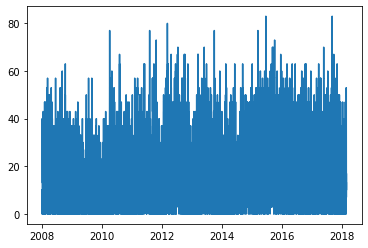

In [136]:
#Original without seasonality removed
pyplot.plot(df.kp)
pyplot.show()

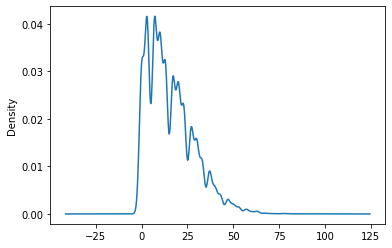

In [137]:
df['kp'].plot(kind='kde')
pyplot.show()

count    89065.000000
mean        15.758659
std         12.555353
min          0.000000
25%          7.000000
50%         13.000000
75%         23.000000
max         83.000000
Name: kp, dtype: float64


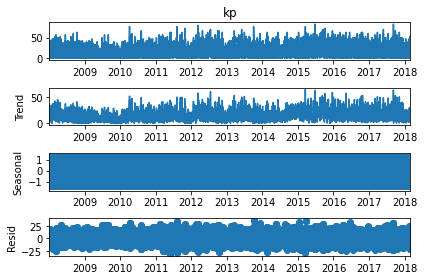

In [138]:
column = 'kp'
diff = SeasonalityAdjustment(df, column)

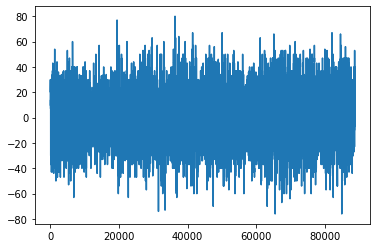

In [139]:
pyplot.plot(diff)
pyplot.show()

In [140]:
# column = 'test'
# diff = SeasonalityAdjustment(dfr, column)

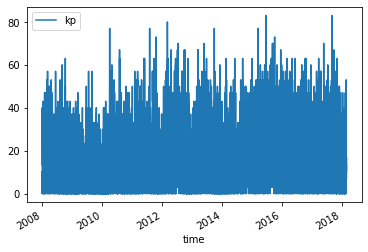

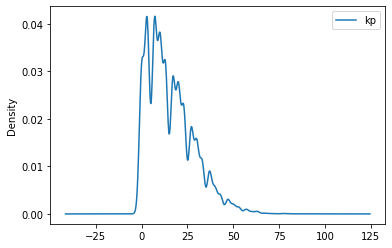

                 kp
count  89065.000000
mean      15.758659
std       12.555353
min        0.000000
25%        7.000000
50%       13.000000
75%       23.000000
max       83.000000


In [141]:
# line plot of residuals
residuals = pd.DataFrame(df.kp)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [142]:
dfr['test'] = diff
dfr = dfr.test.to_frame()
dfr.describe()

,test
count,88700.000000
mean,-0.008117
std,16.989341
min,-76.000000
25%,-10.000000
50%,0.000000
75%,10.000000
max,80.000000


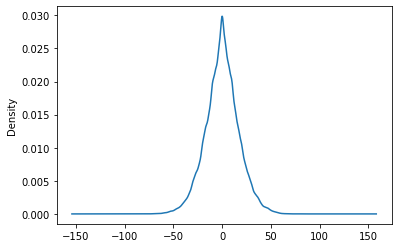

In [157]:
dfr.test.plot(kind='kde')
pyplot.show()

In [ ]:
##### with a mean of or close to zero we can see that this method has worked. we can also look at the histogram and 

# Method 2

time
2008-01-31 00:00:00+00:00    17.269071
2008-02-29 00:00:00+00:00    21.159483
2008-03-31 00:00:00+00:00    21.165323
2008-04-30 00:00:00+00:00    18.812500
2008-05-31 00:00:00+00:00    14.580645
2008-06-30 00:00:00+00:00    14.845833
2008-07-31 00:00:00+00:00    12.100806
2008-08-31 00:00:00+00:00    10.504032
2008-09-30 00:00:00+00:00    11.741667
2008-10-31 00:00:00+00:00    13.358871
2008-11-30 00:00:00+00:00     9.000000
2008-12-31 00:00:00+00:00     9.875000
2009-01-31 00:00:00+00:00    10.189516
Freq: M, Name: kp, dtype: float64


F:\Astra\conda2\envs\Austin\lib\site-packages\pandas\core\arrays\datetimes.py:1102: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


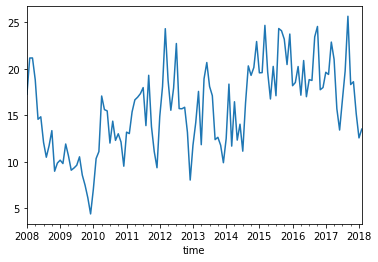

# Method 2 Auto Regressive Integrated Moving Average'

In [149]:
from matplotlib import pyplot
from numpy import polyfit

In [153]:
df.kp.describe()

count    89065.000000
mean        15.758659
std         12.555353
min          0.000000
25%          7.000000
50%         13.000000
75%         23.000000
max         83.000000
Name: kp, dtype: float64

### ARIMA models
###### Auto Regressive Integrated Moving Average'

In [154]:
#https://www.statsmodels.org/stable/index.html#

In [155]:
mod = sm.tsa.arima.ARIMA(df.kp, order=(1, 0, 0))
res = mod.fit()
print(res.summary())

F:\Astra\conda2\envs\Austin\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
F:\Astra\conda2\envs\Austin\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
F:\Astra\conda2\envs\Austin\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                     kp   No. Observations:                89065
Model:                 ARIMA(1, 0, 0)   Log Likelihood             -263217.130
Date:                Fri, 09 Apr 2021   AIC                         526440.260
Time:                        13:21:50   BIC                         526468.451
Sample:                    01-01-2008   HQIC                        526448.860
                         - 02-28-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.7587      0.246     64.119      0.000      15.277      16.240
ar.L1          0.9290      0.001    734.968      0.000       0.926       0.931
sigma2        21.6020      0.048    446.793      0.0

The data above looks like we removed the heteroscatasisty but we still seem to be holding a trend even with the values centered over zero

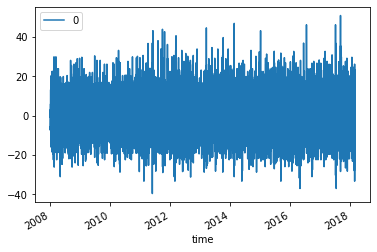

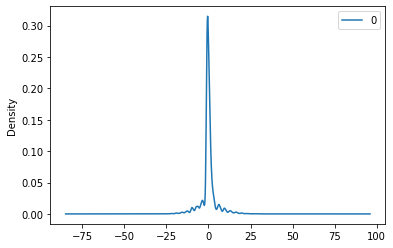

                  0
count  89065.000000
mean      -0.000029
std        4.647832
min      -39.643852
25%       -0.906408
50%       -0.195982
75%        0.798614
max       50.798614


In [156]:
# line plot of residuals
residuals = pd.DataFrame(res.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())